In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving ushape.csv to ushape.csv


In [3]:
import pandas as pd
df = pd.read_csv('ushape.csv')
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


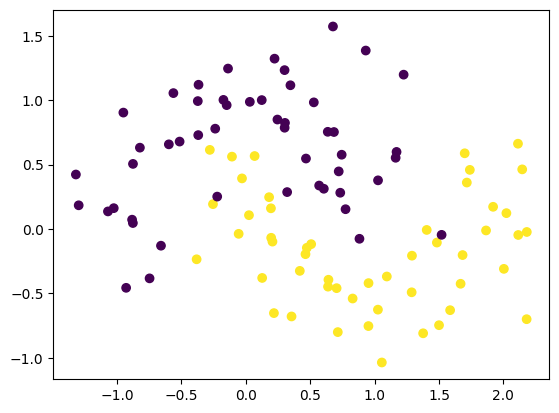

In [4]:
plt.scatter(df['X'], df['Y'],c=df['class'])

In [5]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [6]:
model= Sequential()
model.add(Dense(10,activation='tanh', input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='he_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='he_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='he_normal'))
model.add(Dense(10,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 470 (1.84 KB)

 Trainable params: 470 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.get_weights()

[array([[ 0.73901725, -0.87051094,  1.2161988 ,  0.69260305, -1.6795816 ,
          0.6035109 , -0.12948677,  0.302233  ,  0.5820489 , -0.4703207 ],
        [-1.0413035 , -0.29666278,  0.18813728,  0.21540524, -0.94564724,
          0.348433  ,  1.4516232 , -0.6458138 , -1.5773492 , -1.3045808 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.42465505,  0.29901636,  0.953255  ,  0.01908134, -0.2721457 ,
         -0.11605266, -0.42505994, -0.31111583,  0.11200015, -0.65296406],
        [ 0.1082302 ,  0.37273437, -0.110529  , -0.02718913,  0.40181923,
         -0.68654025,  0.706139  , -0.49932772,  0.32703337,  0.38081953],
        [ 0.13481116,  0.5634655 ,  0.53998923,  0.53367865,  0.4765623 ,
         -0.15540092,  0.2975522 ,  0.11162133,  0.611547  , -0.3985901 ],
        [ 0.34984982,  0.94973135, -0.2474449 , -0.09781866, -0.25277427,
         -0.21509698, -0.13817666, -0.10857359, -0.21991006, -0.04660574],
        [-0.07322

In [8]:
initial_weights=model.get_weights()

In [9]:
shapes = [w.shape for w in model.get_weights()]

# Initialize empty list for new weights
initial_weights = []

# Fill weights using He initialization and biases with zeros
for i, shape in enumerate(shapes):
    if len(shape) == 2:  # it's a weight matrix
        fan_in = shape[0]
        weight = np.random.randn(*shape) * np.sqrt(1. / fan_in)
        initial_weights.append(weight)
    elif len(shape) == 1:  # it's a bias vector
        bias = np.zeros(shape)
        initial_weights.append(bias)

In [10]:
initial_weights[0]=np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1]=np.zeros(model.get_weights()[1].shape)
initial_weights[2]=np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[1]=np.zeros(model.get_weights()[3].shape)
initial_weights[4]=np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[1]=np.zeros(model.get_weights()[5].shape)
initial_weights[6]=np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[1]=np.zeros(model.get_weights()[7].shape)
initial_weights[8]=np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[1]=np.zeros(model.get_weights()[9].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[-0.13384296, -1.2772652 , -0.78061044, -0.6284733 ,  1.1810597 ,
         -1.6088095 ,  1.0547297 ,  0.00788056, -0.09811611,  0.48275962],
        [-0.63861746,  0.84805685,  0.2606305 , -0.19060831,  1.1012901 ,
          0.1378455 ,  0.45260215,  0.66719496, -1.414008  , -0.4802603 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 1.25236556e-01, -1.57021835e-01,  7.01186836e-01,
         -5.19065320e-01, -5.22771299e-01,  1.13832124e-01,
         -4.89686072e-01, -8.21722485e-03, -1.40934765e-01,
          2.45344326e-01],
        [-5.06551027e-01, -3.98777723e-01, -3.62370014e-01,
          1.68480277e-02, -2.40978822e-01,  4.14744392e-03,
          6.96783304e-01,  6.07524097e-01, -4.37236875e-01,
          1.99297085e-01],
        [-1.72877178e-01,  7.93080851e-02, -6.73913956e-01,
          5.36844969e-01, -4.06375229e-02,  2.83221831e-04,
          6.94936931e-01, -1.57162726e-01, -3.03107679e-01,
         -2.2031518

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history=model.fit(X,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.0289 - loss: 2.2472 - val_accuracy: 0.1000 - val_loss: 2.2288
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1453 - loss: 2.1984 - val_accuracy: 0.1500 - val_loss: 2.1806
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2281 - loss: 2.1456 - val_accuracy: 0.2000 - val_loss: 2.1322
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2609 - loss: 2.1143 - val_accuracy: 0.2500 - val_loss: 2.0834
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3523 - loss: 2.0579 - val_accuracy: 0.2500 - val_loss: 2.0360
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3391 - loss: 2.0120 - val_accuracy: 0.2500 - val_loss: 1.9893
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3586 - loss: 1.9660 - val_accuracy: 0.2500 - val_loss: 1.9432
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3719 - loss: 1.9162 - val_accuracy: 0.3500 - val_loss

In [15]:
model.get_weights()

[array([[-0.22080465, -1.0393937 , -0.5636591 , -0.5370358 ,  1.0605521 ,
         -1.3825622 ,  0.9842985 ,  0.06795147,  0.00831725,  0.511438  ],
        [-0.77318203,  1.0199116 ,  0.43265852, -0.23973536,  0.9030111 ,
          0.09391144,  0.43600407,  0.59836525, -1.3672152 , -0.5974937 ]],
       dtype=float32),
 array([ 0.11257663,  0.14818041, -0.05700994, -0.20510726,  0.16264865,
        -0.25516245,  0.18904844,  0.21854281, -0.1178523 , -0.15637085],
       dtype=float32),
 array([[ 0.30233863, -0.21997495,  0.6486003 , -0.5471143 , -0.59356683,
          0.05026975, -0.65404516,  0.02203169, -0.10704994,  0.16649006],
        [-0.48135307, -0.4555703 , -0.33433467,  0.10508934, -0.322189  ,
          0.0142486 ,  0.6194915 ,  0.738841  , -0.34122956,  0.2574002 ],
        [-0.18214692,  0.08683369, -0.6405733 ,  0.6610699 , -0.05834997,
          0.06991743,  0.55335397, -0.1276798 , -0.22042188, -0.14969529],
        [-0.406006  , -0.03117736, -0.24712166, -0.57305336, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

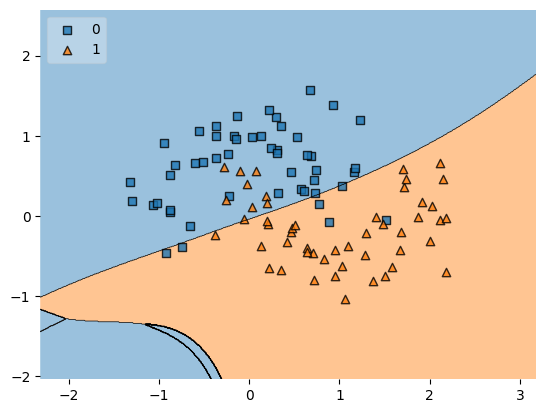

In [16]:
from mlxtend.plotting import plot_decision_regions
class KerasModelWrapper:
    def __init__(self, keras_model):
        self.model = keras_model

    def predict(self, X):
        probs = self.model.predict(X)
        return np.argmax(probs, axis=1)  # Return class labels

# Instantiate wrapper
wrapped_model = KerasModelWrapper(model)

# Now plot (make sure X has only 2 features!)
plot_decision_regions(X, y.astype('int'), clf=wrapped_model, legend=2)